# Section 1.5

## Advanced Problems

### Equation (1.6) 

$y[n]=ay[n-1]+x[n]$

### (a).

Write a function y=diffeqn(a,x,yn1) which computes the output y[n] of the causal sustem determined by Eq. (1.6). The input vector x contains $x[n]$ for $0 \leq n \leq N-1$ and yn1 supplies the value of y[-1]. The output vector y contains $y[n]$ for $0 \leq n \leq N-1$. The first line of your function should be 

def diffeqn(a,x,yn1):

Hint: Note that y[-1] is necessary for computing y[0], which is the first step of the autoregression. Use a for loop in your function to compute y[n] for successively larger values of n, starting with $n=0$.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# This function implements the first order difference equation
# This is also called the first order autoregression equation
# y[n]=ay[n-1]+x[n]
# @parameter a multiplier 
# @parameter x input sequence
# @parameter yn1 boundary condition for calculating first value of y[n]
# @return y output sequence as numpy array
def diffeqn(a,x,yn1):
    y = []    # Ouput sequence starts out empty
    for val in x:    # Iterate over the input sequence
        yn = val + a * yn1    # Calculate the current value of output sequence 
        y.append(yn)    # Append current value of output sequence to output sequence
        yn1 = yn    # Update previous output with current output for next iteration
    return np.array(y)    # Return the output sequence as a numpy array

### (b).

Assume that a=1 y[-1]=0, and that we are only interested in the ouput over the interval $0 \leq n \leq 30$. Use your function to compute the response due to $x_1[n]= \delta [n]$ and $x_2[n]=u[n]$, the unit impuse and unit step, respectively. Plot each response using stem.

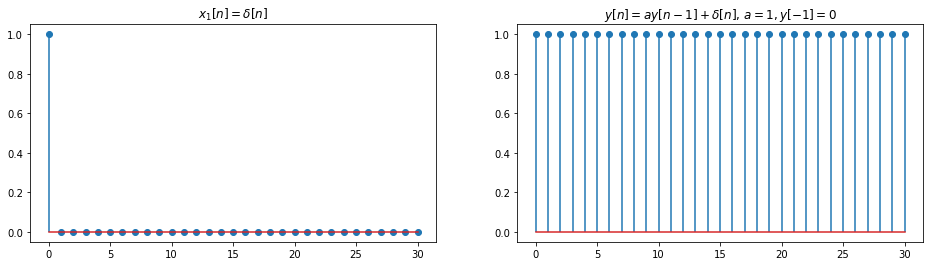

In [11]:
# n ranges from 0 to 30
n = np.arange(0,31)

# Input sequence is the unit impulse
xn = np.array([1 if val == 0 else 0 for val in n])
a = 1     # Multiplier is 1
yn1 = 0     # Boundary Condition is 0
yn = diffeqn(a, xn, yn1)     # Use the function above to calculate the output sequence

# Plot the input sequence and the output sequence
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.stem(n, xn)
plt.title('$x_1[n] = \delta [n]$')
plt.subplot(1,2,2)
plt.stem(n, yn)
plt.title('$y[n] = ay[n-1] + \delta [n]$, $a=1, y[-1]=0$')
plt.show()

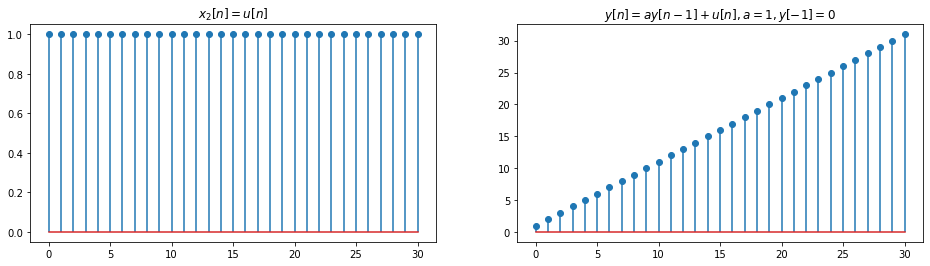

In [10]:
# n defined over 0 to 30
n = np.arange(0,31)
# x[n] is the unit step function
xn = np.array([1 if val >= 0 else 0 for val in n])

a = 1    # multiplier is 1
yn1 = 0    # Boundary condition 

# Calculate the oupt secquence using the function above
yn = diffeqn(a, xn, yn1)

# Plot the input and the output
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.stem(n, xn)
plt.title('$x_2[n]=u[n]$')
plt.subplot(1,2,2)
plt.stem(n, yn)
plt.title('$y[n] = a y[n-1] + u[n], a = 1, y[-1]=0$')
plt.show()

### (c).

Assume again that a=1, but that y[-1]=-1. Use your function to compute y[n] over $0 \leq n \leq 30$ when the inputs are $x_1[n] = u[n]$ and $x_2[n] = 2u[n]$. Define the outputs produced by the two signals to be $y_1[n]$ and $y_2[n]$, respectively. Use stem to display bot outputs. Use stem to plot $(2y_1[n] - y_2[n])$. Give that Eq. (1.6) is a linear difference equation, why isn't this difference identically zero?

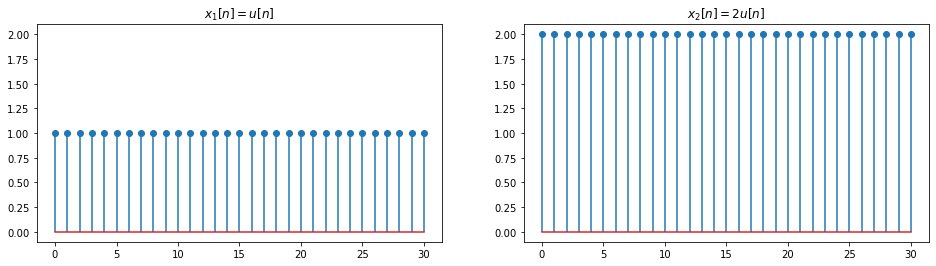

In [18]:
# Define n in the range 0 to 30
n = np.arange(0,31)
# input 1 is the unit step
x1n = np.array([1 if val >= 0 else 0 for val in n])
# input 2 is 2 times the unit step
x2n = 2 * x1n

# Plot the input sequences
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.stem(n, x1n)
plt.title('$x_1[n]=u[n]$')
plt.ylim([-0.1,2.1])
plt.subplot(1,2,2)
plt.stem(n, x2n)
plt.title('$x_2[n]=2u[n]$')
plt.show()

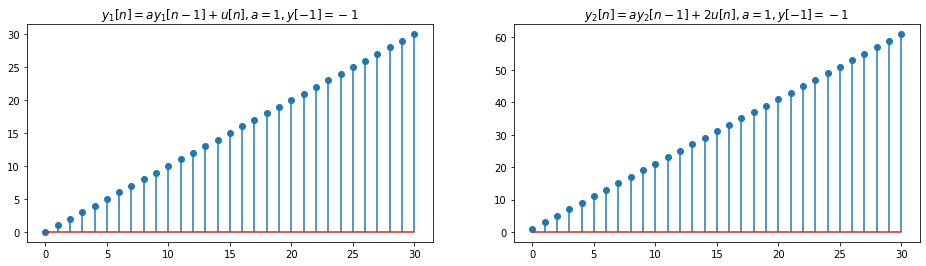

In [47]:
# define the parameters and boundary conditions
a = 1
yn1 = -1

# Calculate the two outputs of the difference equation for the two inputs using the above function
y1n = diffeqn(a,x1n,yn1)
y2n = diffeqn(a,x2n,yn1)

# Plot the two outputs
# print(y1n, y2n)
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.stem(n,y1n)
plt.title('$y_1[n]=ay_1[n-1]+u[n], a=1, y[-1]=-1$')
plt.subplot(1,2,2)
plt.stem(n,y2n)
plt.title('$y_2[n]=ay_2[n-1]+2u[n], a=1, y[-1]=-1$')
plt.show()

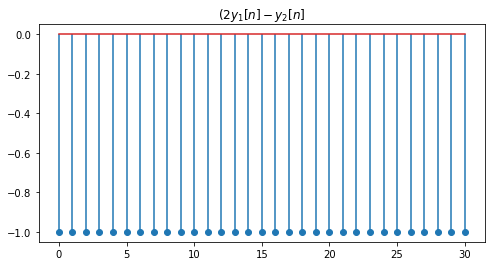

In [49]:
# Subtracting y2n from 2*y1n
y3n = 2*y1n - y2n
#print(y3n)

# Plotting the results
plt.figure(figsize=(8,4))
plt.stem(n,y3n)
plt.title('$(2y_1[n]-y_2[n]$')
plt.show()

Why is this not identically zero?

I have done some working out and I conjecture (I don't want to do the proof, but a proof by induction might work?) that:

$(2y_1[n] - y_2[n]) = a^n y[-1]$ for equation (1.6)

In this case we have $a=1$ and $y[-1] = -1$,

Therefore,

$(2y_1[n] - y_2[n]) = 1^n (-1) = -1$ for all values of n.

There is still the fact that equation (1.6) is a linear equation. It is linear, but the system is not linear. The above example is a counter example to Linearity of the system. We can also show that the system is not linear by doing the math:

$y[n] = ay[n-1]+ x[n]$

Define inputs $x_1[n]$ and $x_2[n]$, and scalars $\alpha$ and $\beta$,

$y_1[n] = a y_1[n-1] + x_1[n]$

$y_2[n] = a y_2[n-1] + x_2[n]$

Then define a third input as a linear combination of the the other two inputs.

$x_3[n] = \alpha x_1[n] + \beta x_2[n]$

$y_3[n] = a y_3[n-1] + x_3[n]$

$y_3[n] = a y_3[n-1] + \alpha x_1[n] + \beta x_2[n]$

This is not equal to $\alpha y_1[n] + \beta y_2[n]$, so the system is not linear, even though the equation itself is linear.

### (d). 

The causal systems described by Eq. (1.6) are BIBO (bounded-input bounded-output) stable whenever $|a| < 1$. A property of these stable systems is that the effect of the initial condition becomes insignificant for sufficiently large n. Assume $a=1/2$
and that x contains $x[n]=u[n]$ for $0 \leq n \leq 30$. Assuming both $y[-1]=0$ and $y[-1]= 1/2$, compute the two output signals $y[n]$ for $0 \leq n \leq 30$. Use stem to display both responses. How do they differ?

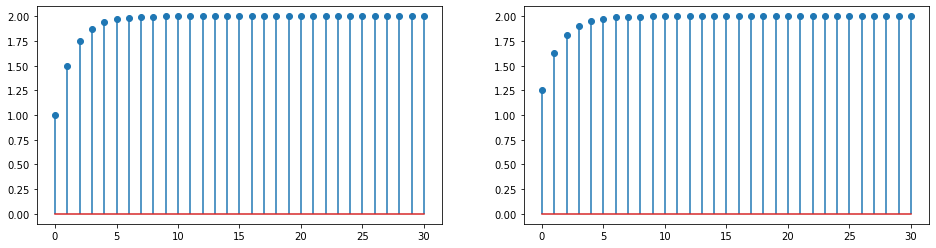

In [17]:
# n ranges from 0 to 30
n = np.arange(0, 31)
# x[n] = u[n]
xn = np.array([1 if val >= 0 else 0 for val in n])
# Setting the multiplier and initial conditions
a = 1./2. # This makes the system stable
yn1_1 = 0.
yn1_2 = 1./2.

y1n = diffeqn(a, xn, yn1_1)
y2n = diffeqn(a, xn, yn1_2)
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.stem(n,y1n)
plt.subplot(1,2,2)
plt.stem(n,y2n)
plt.show()

[2.50000000e-01 1.25000000e-01 6.25000000e-02 3.12500000e-02
 1.56250000e-02 7.81250000e-03 3.90625000e-03 1.95312500e-03
 9.76562500e-04 4.88281250e-04 2.44140625e-04 1.22070312e-04
 6.10351562e-05 3.05175781e-05 1.52587891e-05 7.62939453e-06
 3.81469727e-06 1.90734863e-06 9.53674316e-07 4.76837158e-07
 2.38418579e-07 1.19209290e-07 5.96046448e-08 2.98023224e-08
 1.49011612e-08 7.45058060e-09 3.72529030e-09 1.86264515e-09
 9.31322575e-10 4.65661287e-10 2.32830644e-10]


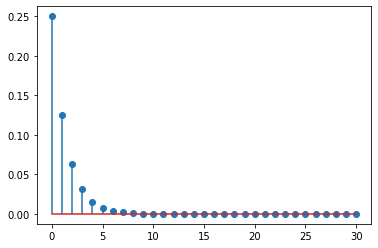

In [19]:
y3n = y2n - y1n
print(y3n)
plt.stem(n, y3n)
plt.show()

These plots differ in all of their values, but they are both approaching the same value. In this case they both converge to 2, but the different initial conditions mean that they calculate to different values on the way to 2.